<a href="https://colab.research.google.com/github/zqzhu0609/R/blob/main/GSEA_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
install.packages("cowplot")
install.packages("gridExtra") # Change to install.packages
BiocManager::install("clusterProfiler")
BiocManager::install("org.Hs.eg.db")
BiocManager::install("msigdbr")
BiocManager::install("enrichplot")
BiocManager::install("fgsea")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.3 (2025-02-28)

Installing package(s) 'BiocVersion', 'clusterProfiler'

also installing the dependencies ‘zlibbioc’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘formatR’, ‘XVector’, ‘GenomeInfoDb’, ‘lambda.r’, ‘futile.options’, ‘gridGraphics’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘lazyeval’, ‘plogr’, ‘png’, ‘Biostrings’, ‘futile.logger’, ‘snow’, ‘BH’, ‘fastmatch’, ‘ggplotify’, ‘patchwork’, ‘ggforce’, ‘ape’, ‘tidytree’, ‘treeio’, ‘R.oo’, ‘R.methodsS3’, ‘BiocGenerics’, ‘Biobase’, ‘IRanges’, ‘RSQLite’, ‘S4Vector

In [4]:

# Load the libraries
library(clusterProfiler)
library(org.Hs.eg.db)
library(msigdbr)
library(enrichplot)
library(fgsea)
library(gridExtra)



clusterProfiler v4.14.6 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

Guangchuang Yu, Li-Gen Wang, Yanyan Han and Qing-Yu He.
clusterProfiler: an R package for comparing biological themes among
gene clusters. OMICS: A Journal of Integrative Biology. 2012,
16(5):284-287


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbi

In [5]:
# Load the CSV file
dir("/content/")
data <- read.csv('/content/WT2.csv')
# Check the first few rows of the data
head(data)

[1] "sample_data" "WT2.csv"

,Gene,Score
,<chr>,<dbl>
1,MYBPC1,9.000831
2,STEAP4,8.086381
3,SLC2A3,7.991232
4,ZNF812P,7.479244
5,SNAI2,7.023302
6,SLC2A14,6.928709


In [6]:
# Example: If the CSV file has columns "Gene" and "Rank"
ranked_list <- data$Score
names(ranked_list) <- data$Gene

# Sort the ranked list in decreasing order
ranked_list <- sort(ranked_list, decreasing = TRUE)

In [7]:
# Run GSEA with GO terms
gsea_result <- gseGO(
    geneList = ranked_list,
    ont = "BP",                    # Biological Process
    OrgDb = org.Hs.eg.db,          # Organism database
    keyType = "SYMBOL",            # Gene identifier type
    exponent = 1,
    minGSSize = 10,
    maxGSSize = 500,
    pvalueCutoff = 0.05,
    verbose = TRUE
)

using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (13.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“There were 29 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
Warning message in fgseaMultilevel(path

In [8]:
# View the results
head(gsea_result)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GO:0002181,GO:0002181,cytoplasmic translation,159,0.6012163,2.793568,1e-10,3.179474e-08,2.842659e-08,5988,"tags=73%, list=27%, signal=53%",PKP1/RBM24/CPEB3/SARS1/EIF3I/MTOR/EIF2S2/AARS1/RPS10/RPS18/RPL18/RPS5/RPL18A/RPL38/YBX3/RPS8/EIF3J/RPL8/RPS16/RPL7A/RPS11/RPL10/RACK1/FAU/RPL36/RPLP0/RPL13/RPS3/RPS15/RPL19/RPL3/RPS19/RPL12/IMPACT/RPS2/ETF1/PABPC1/EIF3G/RPS6/RPL13A/RPLP2/EIF3L/RPL14/RPS28/EIF3M/EIF3H/RPL15/RPS29/RPL4/RPL35A/RPS4X/RPS14/EIF2S3/EIF2B2/RPL29/EIF3F/RPL27/RPL32/RPLP1/RPL37A/YBX1/RPSA/EIF2B4/CSDE1/RPS13/CNBP/FTSJ1/RPL35/RPL28/RPL5/RPL27A/EIF3D/RPL24/NCK1/DRG1/EIF3K/RPL10A/RPS20/UBA52/RPS7/GTPBP1/RPS23/RPS21/EIF2B1/EIF4G1/PAIP1/ALKBH3/RPL22L1/RPS25/RPL6/RPS3A/ZC3H15/EIF2D/RPL23A/NMNAT2/EIF3A/RPL34/DENR/RPL30/SH3BGRL/RPS15A/RPL37/RWDD1/EIF3B/RPL31/RPS12/RPL26L1/FMR1/RPL11/DRG2/RPL9/HNRNPU/YTHDF2/EIF3E/RPL26/RPS24
GO:0030968,GO:0030968,endoplasmic reticulum unfolded protein response,79,0.6281911,2.774228,1e-10,3.179474e-08,2.842659e-08,5683,"tags=72%, list=26%, signal=54%",AGR2/CTH/ERN1/BHLHA15/ATF3/DNAJB9/FGF21/DDIT3/DNAJC10/CREB3L1/HERPUD1/FICD/SERP1/STC2/SELENOS/ATF4/EDEM3/EDEM2/CREB3/ERO1A/PPP1R15B/ASB11/EDEM1/ERLEC1/EIF2AK3/TMED2/RACK1/ATF6/HSPA5/TBL2/EIF2S1/MBTPS2/DDRGK1/TMEM33/NFE2L2/NCK1/VCP/AMFR/DERL1/WFS1/PTPN1/BBC3/CREBRF/STUB1/VAPB/HERPUD2/QRICH1/NCK2/RHBDD2/YOD1/DERL2/EIF2AK2/RNF7/COPS5/MBTPS1/OS9/XBP1
GO:0042254,GO:0042254,ribosome biogenesis,307,0.5157963,2.677479,1e-10,3.179474e-08,2.842659e-08,7320,"tags=64%, list=33%, signal=43%",EXOSC6/ISG20/PAK1IP1/GLUL/MPV17L2/ZNF622/SBDS/DDX21/REXO5/NOP53/ZNF593/RPS5/EXOSC5/RPL38/DDX49/TRMT112/RPS8/RIOX2/RPS16/RPL7A/RPS11/FAU/RPL10L/IMP3/NGRN/RPS15/RPS19/SNU13/RIOK3/RPS6/NPM3/RPL14/PNO1/RPS28/GTF3A/EIF6/RPL35A/RPS4X/RPS14/UTP15/RPL27/RRS1/TSR3/RPSA/MPHOSPH10/RPS19BP1/VCX/RPS13/NOL7/REXO4/UTP23/RPL35/KAT2B/NOB1/EXOSC3/NIP7/EIF4A3/RPL5/MRTO4/EBNA1BP2/RPSA2/RPL24/NOA1/RPF2/IMP4/EMG1/GAR1/FCF1/MAK16/EXOSC8/POP7/RPS27L/WDR74/TFB2M/SDE2/WDR55/NOP14/RSL24D1/RPS7/EXOSC4/C1QBP/EXOSC1/RPS23/RPS21/YBEY/FBL/NOLC1/NMD3/PES1/BYSL/RPP38/PA2G4/UTP4/UTP11/SART1/NSUN5/SRFBP1/RPS25/EIF2A/NSUN4/EIF5B/RRP9/WDR18/RPS3A/PIH1D1/RPL7L1/UTP14C/UTP18/RRP36/NOP10/RPP40/RPF1/NOP56/NUP88/RPUSD2/DDX54/NPM1/NHP2/RPS15A/BUD23/MRPS7/CUL4A/NOP16/PIN4/ISG20L2/CHD7/EIF1AX/CINP/UTP3/METTL25B/ABT1/NOC4L/DDX3X/UTP6/SLX9/RPS12/RPL26L1/RPL11/NOP2/TSR2/YTHDF2/BMS1/NOL10/RPL26/UTP14A/NAF1/RPS24/ERAL1/GNL3L/RIOK2/RRP15/WDR43/MYBBP1A/UTP25/DDX18/ZNHIT6/NUDT16/ERI3/DIS3/RCC1L/RBIS/RAN/GRWD1/XRCC5/DHX29/MCAT/LSG1/DDX31/GTPBP4/EIF5/METTL5/USP16/RRP7A/LTO1/WDR12/RPS27A/GNL2/RIOK1/SDAD1/MRPS2/DDX27/MALSU1/RBM10/RPP30/NOL6/FTSJ3/BOP1/WDR36/WBP11/MRM2/NSA2/MTERF3/TRMT2B/DDX47/POP4/MRM3/TMA16
GO:0035967,GO:0035967,cellular response to topologically incorrect protein,107,0.5857710,2.669313,1e-10,3.179474e-08,2.842659e-08,5683,"tags=67%, list=26%, signal=50%",UMOD/AGR2/CTH/ERN1/BHLHA15/ATF3/DNAJB9/FGF21/DDIT3/DNAJC10/CREB3L1/HERPUD1/FICD/SERP1/STC2/SELENOS/ATF4/EDEM3/EDEM2/CREB3/ERO1A/PPP1R15B/ASB11/RHBDD1/EDEM1/HSPD1/ERLEC1/EIF2AK3/TMED2/RACK1/ATF6/HSPA5/TBL2/SDF2L1/DAXX/EIF2S1/MBTPS2/DDRGK1/TMEM33/BAG3/RNF126/NFE2L2/AKIRIN2/NCK1/VCP/AMFR/DERL1/UFD1/HSF1/CUL3/WFS1/UBR4/PTPN1/TMBIM6/BBC3/CREBRF/STUB1/VAPB/HERPUD2/DNAJB12/QRICH1/NCK2/RHBDD2/YOD1/DERL2/EIF2AK2/RNF7/COPS5/MBTPS1/OS9/UBE2W/XBP1
GO:0034620,GO:0034620,cellular response to unfolded protein,92,0.5965843,2.668343,1e-10,3.179474e-08,2.842659e-08,5122,"tags=64%, list=23%, signal=49%",UMOD/AGR2/CTH/ERN1/BHLHA15/ATF3/DNAJB9/FGF21/DDIT3/DNAJC10/CREB3L1/HERPUD1/FICD/SERP1/STC2/SELENOS/ATF4/EDEM3/EDEM2/CREB3/ERO1A/PPP1R15B/ASB11/RHBDD1/EDEM1/HSPD1/ERLEC1/EIF2AK3/TMED2/RACK1/ATF6/HSPA5/TBL2/DAXX/EIF2S1/MBTPS2/DDRGK1/TMEM33/BAG3/NFE2L2/NCK1/VCP/AMFR/DERL1/HSF1/WFS1/PTPN1/TMBIM6/BBC3/CREBRF/STUB1/VAPB/HERPUD2/QRICH1/NCK2/RHBDD2/YOD1/DERL2/EIF2AK2
GO:0006888,GO:0006888,endoplasmic reticulum to Golgi vesi

In [9]:
# Load MSigDB gene sets (e.g., Hallmark gene sets)
msigdb_sets <- msigdbr(species = "Homo sapiens", category = "H")

# Convert to a list of gene sets
gene_sets <- split(msigdb_sets$gene_symbol, msigdb_sets$gs_name)

# Run GSEA with fgsea
fgsea_result <- fgsea(
    pathways = gene_sets,
    stats = ranked_list,
    minSize = 10,
    maxSize = 500,
    eps = 0.0,
    scoreType = "std"
)

Warning message:
“The `category` argument of `msigdbr()` is deprecated as of msigdbr 9.0.0.
ℹ Please use the `collection` argument instead.”
The 'msigdbdf' package must be installed to access the full dataset.

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (13.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


In [10]:
# View the results
head(fgsea_result[order(pval), ])

pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
HALLMARK_ANDROGEN_RESPONSE,3.308709e-38,1.654354e-36,1.6088796,0.8186366,3.714599,101,"STEAP4, ...."
HALLMARK_OXIDATIVE_PHOSPHORYLATION,4.572372e-17,1.143093e-15,1.0672100,0.5116186,2.464615,197,"GLUD1, I...."
HALLMARK_UNFOLDED_PROTEIN_RESPONSE,3.979952e-16,6.633254e-15,1.0376962,0.6149996,2.773562,112,"CHAC1, E...."
HALLMARK_MTORC1_SIGNALING,3.236561e-14,4.045701e-13,0.9653278,0.4785434,2.347379,200,"SLC2A3, ...."
HALLMARK_MYC_TARGETS_V1,2.381589e-10,2.381589e-09,0.8140358,0.4273839,2.074614,196,"ODC1, PS...."
HALLMARK_E2F_TARGETS,8.022681e-09,6.685567e-08,0.7477397,-0.5132772,-1.887421,197,"RRM2, ES...."


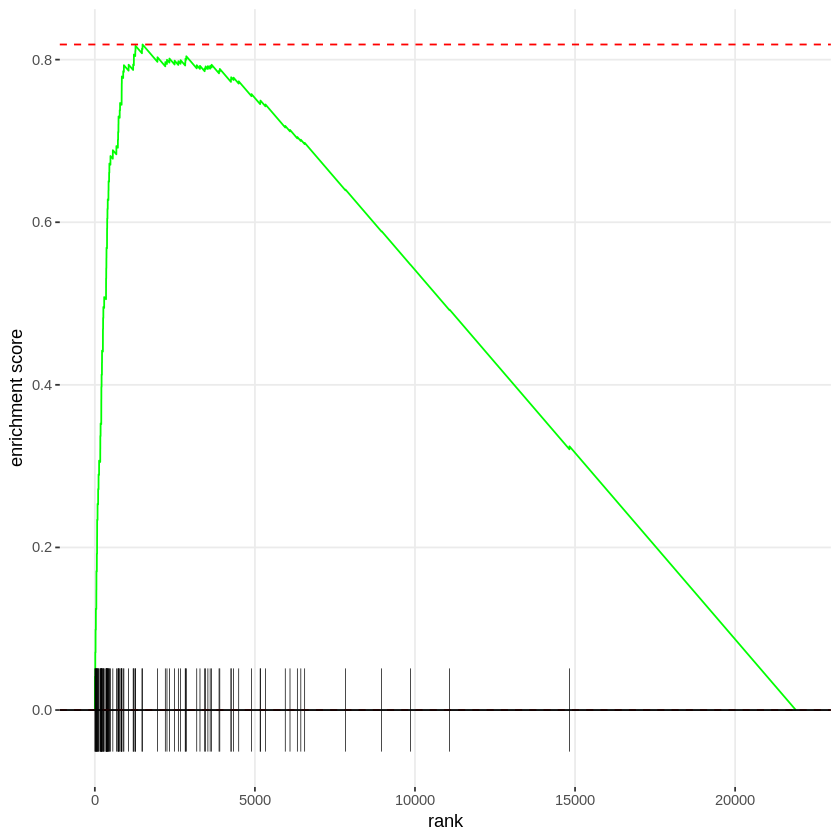

In [11]:
# Plot the enrichment plot for a specific gene set
plotEnrichment(gene_sets[["HALLMARK_ANDROGEN_RESPONSE"]], ranked_list)

In [12]:
library(ggplot2)

library(cowplot)
library(clusterProfiler)
# Generate the base enrichment plot and extract its data
base_plot <- plotEnrichment(gene_sets[["HALLMARK_ANDROGEN_RESPONSE"]], ranked_list)
plot_data <- ggplot_build(base_plot)$data[[1]]  # Extract the curve data (x = rank, y = enrichment score)

# Extract gene ranks for the rank list bar
gene_set <- gene_sets[["HALLMARK_ANDROGEN_RESPONSE"]]
rank_positions <- match(gene_set, names(ranked_list))  # Get positions of genes in ranked_list
rank_bar_data <- data.frame(x = rank_positions, y = rep(0, length(rank_positions)))  # Data for bars



In [13]:
# Rebuild the plot with 2pt curve, white background, grid, and rank bar
my_plot <- ggplot(plot_data, aes(x = x, y = y)) +
  geom_line(size = 2, colour = "black") +  # 2pt curve
  geom_hline(yintercept = 0, linetype = "dashed", colour = "grey50") +  # Zero line
  geom_segment(data = rank_bar_data, aes(x = x, xend = x, y = -0.05, yend = 0.05),
               size = 0.5, colour = "black") +  # Rank list bar spanning above and below
  theme(
    text = element_text(family = "Helvetica", size = 24),
    axis.title = element_text(size = 24, face = "bold"),
    axis.text = element_text(size = 24),
    legend.text = element_text(size = 24),
    plot.title = element_text(size = 24, face = "bold", hjust = 0.5),
    axis.line.x = element_line(size = 1, linetype = "solid", colour = "black"),
    axis.line.y = element_line(size = 1, linetype = "solid", colour = "black"),
    panel.background = element_rect(fill = "white", colour = NA),
    plot.background = element_rect(fill = "white", colour = NA),
    panel.grid.major = element_line(colour = "grey80", size = 0.5),
    panel.grid.minor = element_line(colour = "grey90", size = 0.25)
  ) +
  labs(title = "HALLMARK_ANDROGEN_RESPONSE", x = "Rank", y = "Enrichment Score")



Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


In [14]:
# Create ranked list matrix (bar plot of scores)
ranked_list_data <- data.frame(
  rank = seq_along(ranked_list),
  score = ranked_list
)


In [15]:
install.packages("patchwork") # This command should fix your error
library(patchwork)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




mapping: x = ~x, y = ~y 
geom_text: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

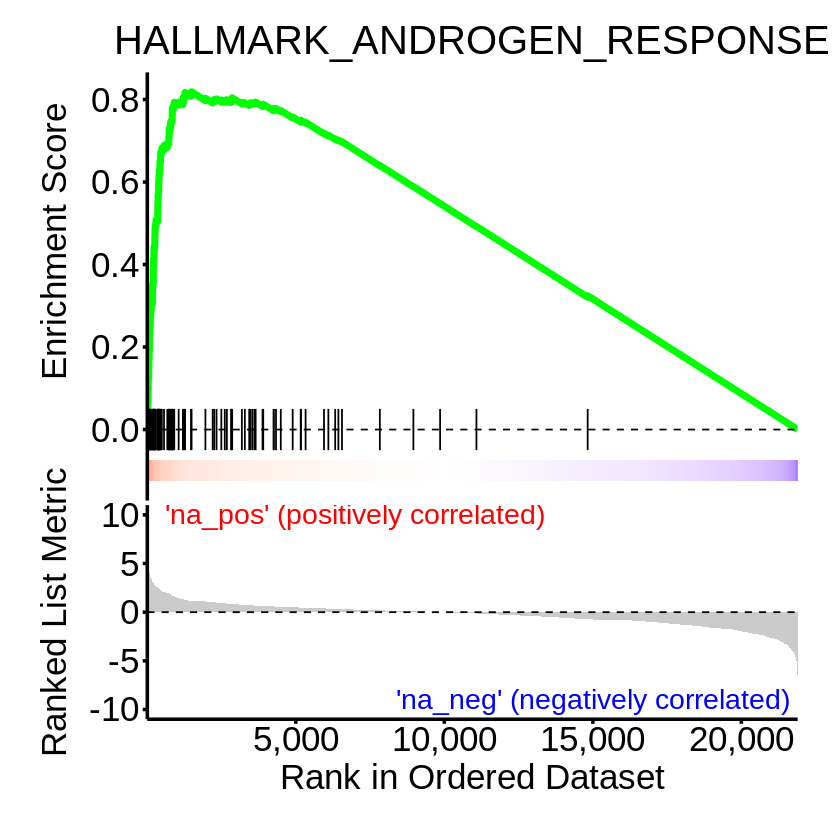

In [23]:
# Combined Heatmap & Enrichment Plot (Top) - Unchanged
combined_plot <- ggplot() +
  geom_tile(data = ranked_list_data, aes(x = rank, y = -0.1, fill = score), height = 0.05) +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
  geom_line(data = plot_data, aes(x = x, y = y), size = 2, colour = "green") +
  geom_segment(data = rank_bar_data, aes(x = x, xend = x, y = 0.05, yend = -0.05),
               size = 0.5, colour = "black") +
  geom_hline(yintercept = 0, linetype = "dashed", colour = "black") +
  scale_x_continuous(expand = c(0, 0), breaks = seq(0, 20000, by = 5000), labels = scales::comma) +
  scale_y_continuous(breaks = seq(0, max(plot_data$y, na.rm = TRUE), by = 0.2), labels = scales::number) +
  theme_minimal() +
  theme(
    text = element_text(family = "Helvetica", size = 21),
    axis.title = element_text(size = 21),
    axis.text = element_text(size = 21,colour = "black"),
    title = element_text(hjust = 0.8),  # Left-align the title to avoid cutoff
    legend.position = "none",
    axis.line.x = element_blank(),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank(),
    axis.line.y = element_line(size = 1, colour = "black"),
    axis.ticks.y = element_line(size = 1, colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    plot.margin = margin(10, 20, 0, 20, "pt")
  ) +
  labs(title = "HALLMARK_ANDROGEN_RESPONSE", x = NULL, y = "Enrichment Score") +
  theme(
  plot.title = element_text(hjust = 0.5, size = 24) # Left-align and increase size
)
  annotate("text", x = 9982, y = -0.2, label = "Zero cross at 9982", size = 6)

# Ranked List Metric Plot (Below) - Adjust y-axis to 10 to -10
ranked_metric_plot <- ggplot(ranked_list_data, aes(x = rank, y = score)) +
  geom_area(fill = "darkgray", alpha = 0.6) +
  geom_hline(yintercept = 0, linetype = "dashed", colour = "black") +
  scale_x_continuous(expand = c(0, 0), breaks = seq(0, 20000, by = 5000), labels = scales::comma) +
  scale_y_continuous(limits = c(-10, 10), breaks = seq(-10, 10, by = 5), labels = scales::number) +  # Set y-axis from -10 to 10 with ticks every 2
  theme_minimal() +
  theme(
    text = element_text(family = "Helvetica", size = 21),
    axis.title.x = element_text(size = 21,colour = "black"),
    axis.title.y = element_text(size = 21,colour = "black"),
    axis.text = element_text(size = 21,colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.line.x = element_line(size = 1, colour = "black"),
    axis.line.y = element_line(size = 1, colour = "black"),
    axis.ticks.x = element_line(size = 1, colour = "black"),
    axis.ticks.y = element_line(size = 1, colour = "black"),
    plot.margin = margin(0, 20, 20, 20, "pt")
  ) +
  labs(x = "Rank in Ordered Dataset", y = "Ranked List Metric") +
  annotate("text", x = 7000, y = 10, label = "'na_pos' (positively correlated)", size = 6, colour = "red") +  # Adjusted y-position
  annotate("text", x = 15000, y = -9, label = "'na_neg' (negatively correlated)", size = 6, colour = "blue")  # Adjusted y-position

# Stack Both Plots Together with Patchwork
final_combined_plot <- combined_plot / ranked_metric_plot +
  plot_layout(heights = c(2, 1))

# Display final stacked visualization
final_combined_plot